In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"E:\Om\intership\tasks\T2\TITANIC.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
missing_values = df.isnull().sum()
missing_values_table = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
})
display(missing_values_table)

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop('Cabin', axis=1, inplace=True)


,Column,Missing Values
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Name,0
4,Sex,0
5,Age,86
6,SibSp,0
7,Parch,0
8,Ticket,0
9,Fare,1


In [5]:
dtypes_table = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes.values
})
display(dtypes_table)

,Column,Data Type
0,PassengerId,int64
1,Survived,int64
2,Pclass,int64
3,Name,object
4,Sex,object
5,Age,float64
6,SibSp,int64
7,Parch,int64
8,Ticket,object
9,Fare,float64


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,29.599282,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.703770,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


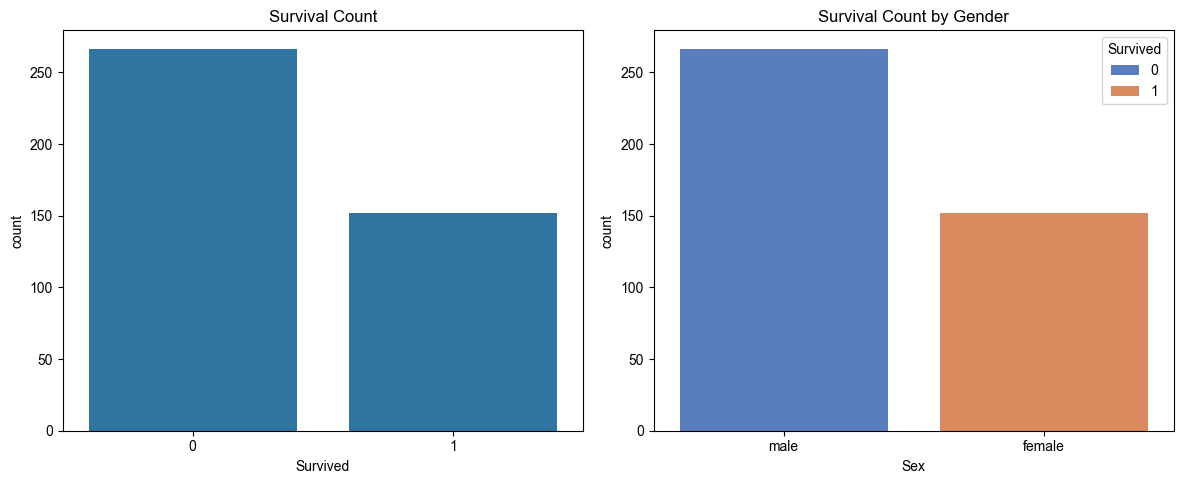

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='Survived', data=df, ax=axes[0])
axes[0].set_title('Survival Count')

sns.countplot(x='Sex', hue='Survived', data=df, palette='muted', ax=axes[1])
axes[1].set_title('Survival Count by Gender')
axes[1].legend(title='Survived', loc='upper right')
sns.set(style="white")
plt.tight_layout()
plt.show()

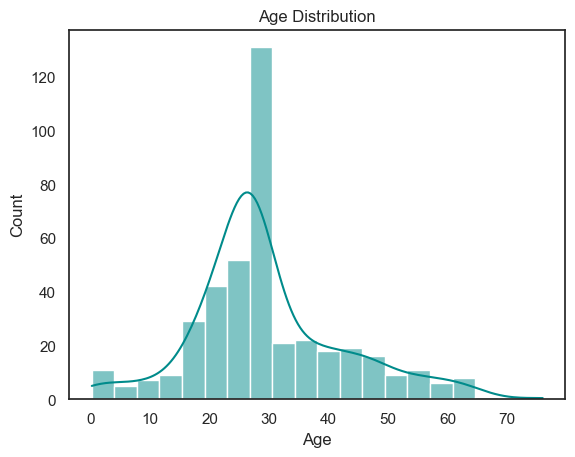

In [8]:
sns.histplot(df['Age'], bins=20, kde=True,color='darkcyan')
sns.set(style="white")
plt.title('Age Distribution')
plt.show()

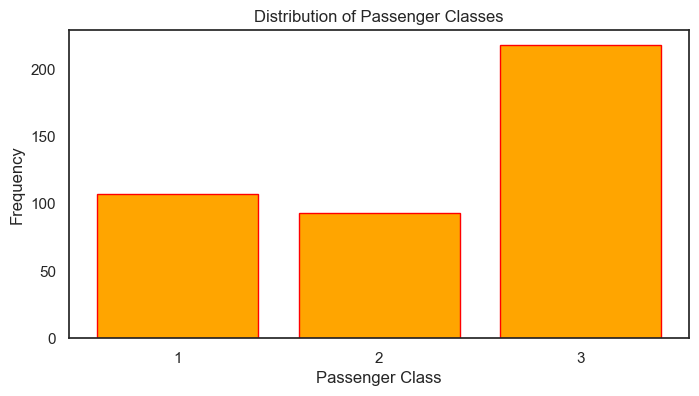

In [9]:
plt.figure(figsize=(8, 4))
plt.hist(df['Pclass'], bins=[1, 2, 3, 4], edgecolor='red', align='left', rwidth=0.8,color='orange')
plt.title('Distribution of Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3])
plt.show()

<Axes: title={'center': 'count of survivors with respect to Pclass'}, xlabel='Survived', ylabel='count'>

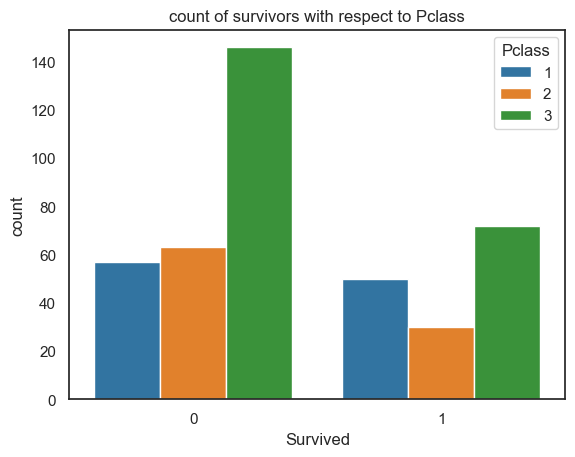

In [10]:
plt.title('count of survivors with respect to Pclass')
sns.countplot(x=df['Survived'], hue=df['Pclass'],palette='tab10')

In [11]:
survival_counts_by_gender = df.groupby('Sex')['Survived'].sum()
display(pd.DataFrame({'Sex': survival_counts_by_gender.index
                      ,'Survival Count': survival_counts_by_gender.values}).set_index('Sex'))
most_survived_sex = survival_counts_by_gender.idxmax()
print(f"\nThe sex that survived the most: {most_survived_sex}")

,Survival Count
Sex,
female,152
male,0



The sex that survived the most: female


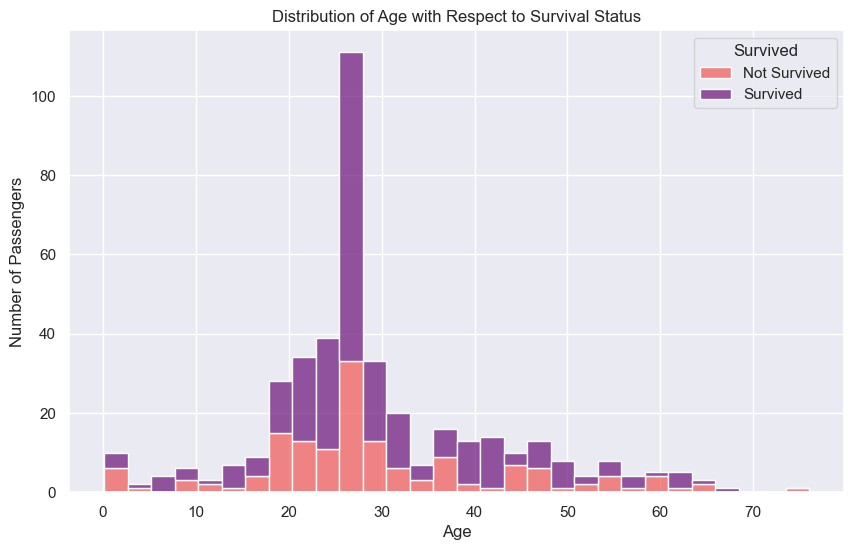

In [12]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(df, x="Age", hue="Survived", multiple="stack", bins=30, palette="magma", edgecolor="w")
plt.title('Distribution of Age with Respect to Survival Status')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')  
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()